# Préparation des données numériques — Ames Housing

**Objectifs pédagogiques**  
- Savoir explorer un jeu de données avec des variables numériques.  
- Identifier et traiter les valeurs manquantes.  
- Détecter et traiter les outliers.  
- Transformer les variables (normalisation, log, etc.).  
- Créer de nouvelles variables (feature engineering).  
- Analyser les corrélations.  
- Sauvegarder un jeu de données nettoyé.

Dataset : Ames Housing (compétition Kaggle *House Prices: Advanced Regression Techniques*).

Informations sur le dataset : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [32]:
# Installer les packages nécessaires (enlever le '#' ci-dessous si besoin)
# !pip install pandas numpy seaborn matplotlib scikit-learn

## Partie 1 : Chargement du jeu de données

In [2]:
import pandas as pd

# Option 1: charger depuis sklearn/openml
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame

# Aperçu
df.shape, df.head()

((1460, 81),
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SaleP

## Partie 2 : Exploration initiale

In [4]:
df.info()
df.describe().T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**À vous** :  
- Combien de lignes et de colonnes contient le dataset ?  
- Quelles colonnes sont numériques ? Catégorielles ?  

## Partie 3 : Exploration des valeurs manquantes

In [29]:
# Comptage des NA par colonne
na_counts = df.isna().sum()

# Ne garder que les colonnes avec au moins un NA
na_counts = na_counts[na_counts > 0].sort_values(ascending=False)

# Afficher les 10 plus problématiques
na_counts.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

**À vous** :  
- Identifiez une variable numérique avec beaucoup de NA.  
- Imputez-la avec une stratégie adaptée (moyenne, médiane ou par catégorie).  

In [13]:
# Exemple: imputation LotFrontage par la médiane globale
if "LotFrontage" in df.columns:
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

na_counts = df.isna().sum().sort_values(ascending = False)
na_counts.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
dtype: int64

## Partie 4 : Gestion des outliers

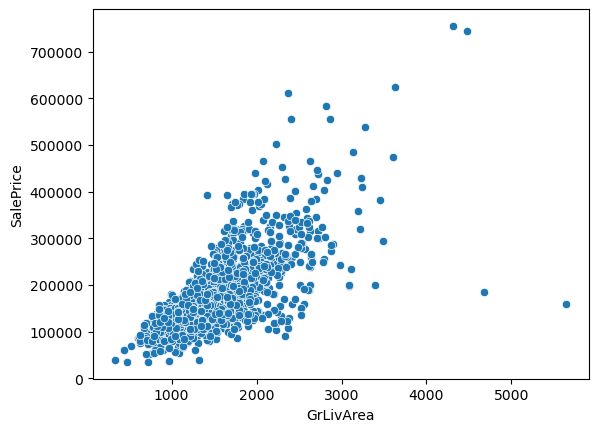

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nuage de points GrLivArea (La superficie habitable au delà du rez-de-chaussée) vs SalePrice
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")
plt.show()

**À vous** :  
- Repérez les maisons avec `GrLivArea > 4000` mais un prix de vente faible.
- Comparer ces maisons avec les maisons `GrLivArea > 4000` avec un prix de ventre élevé selon d'autres variables qui peuvent être interessantes.
- Décider quoi faire des outliers (les supprimer, les garder de côté, les gardes integré au dataset). Expliquer votre choix.

## Partie 5 :  Transformations des variables

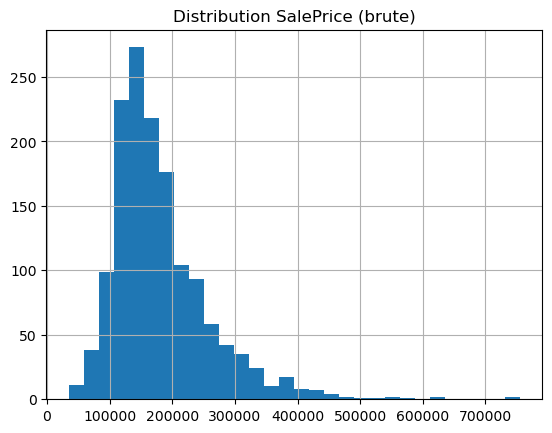

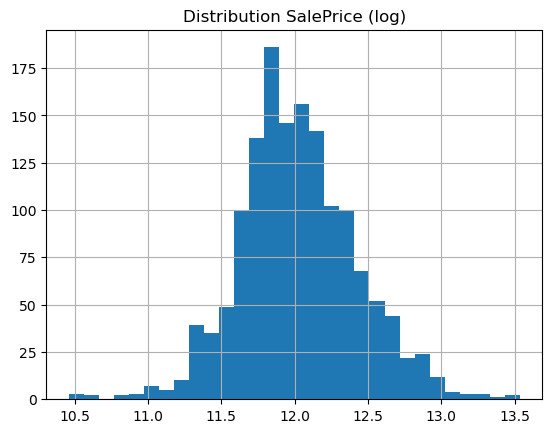

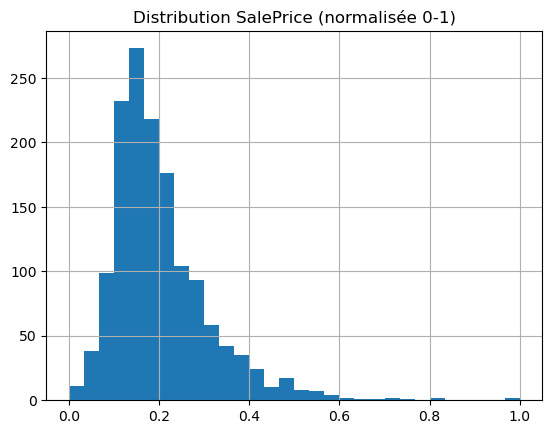

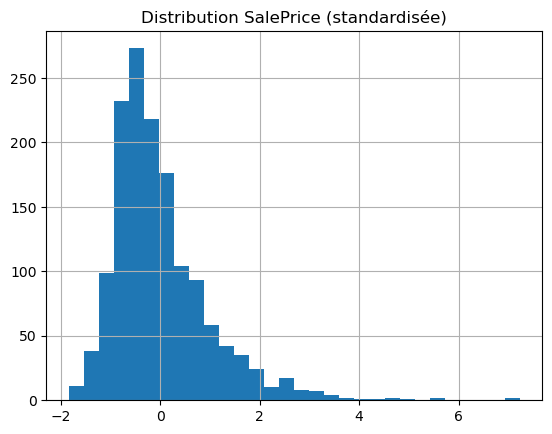

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Histogramme brut
df["SalePrice"].hist(bins=30)
plt.title("Distribution SalePrice (brute)")
plt.show()

# --- Transformation logarithmique
df["SalePrice_log"] = np.log1p(df["SalePrice"])
df["SalePrice_log"].hist(bins=30)
plt.title("Distribution SalePrice (log)")
plt.show()

# --- Normalisation (0-1)
scaler_minmax = MinMaxScaler()
df["SalePrice_minmax"] = scaler_minmax.fit_transform(df[["SalePrice"]])
df["SalePrice_minmax"].hist(bins=30)
plt.title("Distribution SalePrice (normalisée 0-1)")
plt.show()

# --- Standardisation (moyenne = 0, écart-type = 1)
scaler_std = StandardScaler()
df["SalePrice_std"] = scaler_std.fit_transform(df[["SalePrice"]])
df["SalePrice_std"].hist(bins=30)
plt.title("Distribution SalePrice (standardisée)")
plt.show()


**À vous** :  
- Appliquez une transformation logarithmique à `LotArea`.  
- Comparez les distributions des histogrammes avant/après.  

## Partie 6 :  Création de nouvelles variables

In [19]:
# Exemple: âge de la maison
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

# Exemple: nombre total de salles de bain
if {"FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"}.issubset(df.columns):
    df["TotalBath"] = df["FullBath"] + 0.5*df["HalfBath"] + df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"]

df[["HouseAge","TotalBath"]].head()

,HouseAge,TotalBath
0,5,3.5
1,31,2.5
2,7,3.5
3,91,2.0
4,8,3.5


**À vous** :  
- Créez une variable `SurfaceTotale` = `GrLivArea + TotalBsmtSF`.  
- Vérifiez sa corrélation avec `SalePrice` en dessinant un nuage de points.  

## Partie 7 : Exploration des corrélations

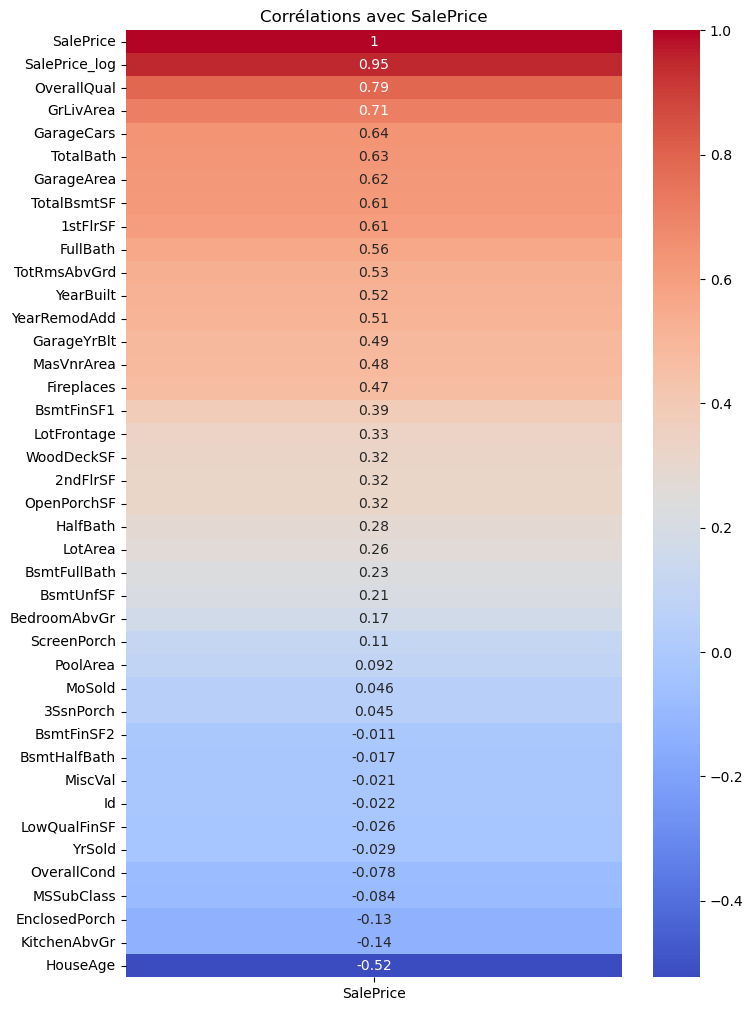

<Figure size 800x1230 with 0 Axes>

<Figure size 800x1230 with 0 Axes>

In [26]:
# Création du tableau de toutes les corrélations du Dataframe.
corr = df.corr(numeric_only=True)

#Spécification de la taille de la figure pour pouvoir afficher toutes les variables.
n_vars = corr.shape[0]
plt.figure(figsize=(8, n_vars * 0.3))

# Selection des corrélations spécifiques à 'SalesPrice", tri par ordre décroissant et affichage en Heatmap
sns.heatmap(
    corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False), 
    annot=True, 
    cmap="coolwarm"
)
plt.title("Corrélations avec SalePrice")
plt.show()

corr = df.corr(numeric_only=True)

# Créer une figure plus haute : 0.3 pouce par variable approx.
n_vars = corr.shape[0]
plt.figure(figsize=(8, n_vars * 0.3))


**À vous** :  
- Quelles sont les 3 variables les plus corrélées positivement avec `SalePrice` ?  
- Interprétez brièvement.  

## Partie 8 : Sauvegarde du dataset nettoyé

In [24]:
df.to_csv("ames_clean.csv", index=False)
print(" Jeu de données nettoyé sauvegardé sous ames_clean.csv")

 Jeu de données nettoyé sauvegardé sous ames_clean.csv


# Pour aller plus loin (On travaillera sur un des datasets présentées ici à partir de la séance prochaine)

**Exploration du datasetAirbnb**  
- Aller sur le site : https://insideairbnb.com/fr/get-the-data/
- Télécharger le fichier listings.csv d'une ville que vous voulez.
- Créer un nouveau Notebook
- Chargez le fichier de données et effectuer une exploration/nettoyage des données.